<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 24px; color:#000;" align="center">| EDA Notebook |</p>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 20px; color:#000;" align="center">Correlation One - DS4A</p>
<p style="text-align:center;">This notebook contains the <b>MODELING</b> of the machine learning algorithms based on the selected features.</p>

## 1. Libraries

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn ligrary
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                    KFold, HalvingGridSearchCV)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder,
                                   OrdinalEncoder, FunctionTransformer)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

## Own specific functions 
from functions import *

In [2]:
#!pip install --user imbalanced-learn==0.9.1


## 2. Importing files

In [3]:
df_students = pd.read_csv("datasets/df_students.csv")

In [4]:
df_analysis(df_students, key_columns=["PER_ID_ANO"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 311866 rows and 35 columns
- Total of NaN values:			 0
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 83.3+ MB

- The key(s):	 ['PER_ID_ANO'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ANO,int64,311866,10,0,0.00000,2017.44093,2013.00000,2015.00000,2017.00000,2020.00000,2022.00000,2.88220
26,INSTITUCION_NIVEL_MEDIA,int64,311866,2,0,0.00000,0.94293,0.00000,1.00000,1.00000,1.00000,1.00000,0.23198
20,INSTITUCION_LATITUDE,float64,311866,76,0,0.00000,5.71590,5.61974,5.70473,5.71505,5.72353,5.75943,0.02154
21,INSTITUCION_LONGITUD,float64,311866,76,0,0.00000,-72.92979,-72.96245,-72.93943,-72.93211,-72.92435,-72.88859,0.01313
22,INSTITUCION_PRESTADOR_DE_SERVICIO,object,311866,4,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,INSTITUCION_TAMAÑO,object,311866,3,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,INSTITUCION_NIVEL_BASICA_PRIMARIA,int64,311866,2,0,0.00000,0.98260,0.00000,1.00000,1.00000,1.00000,1.00000,0.13076
25,INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA,int64,311866,2,0,0.00000,0.94667,0.00000,1.00000,1.00000,1.00000,1.00000,0.22470
27,INSTITUCION_NIVEL_PREESCOLAR,int64,311866,2,0,0.00000,0.96091,0.00000,1.00000,1.00000,1.00000,1.00000,0.19382
18,INSTITUCION_NUMERO_DE_SEDES,float64,311866,8,0,0.00000,3.36785,1.00000,1.00000,3.00000,5.00000,8.00000,2.31163


## 3. Analyzing target variable

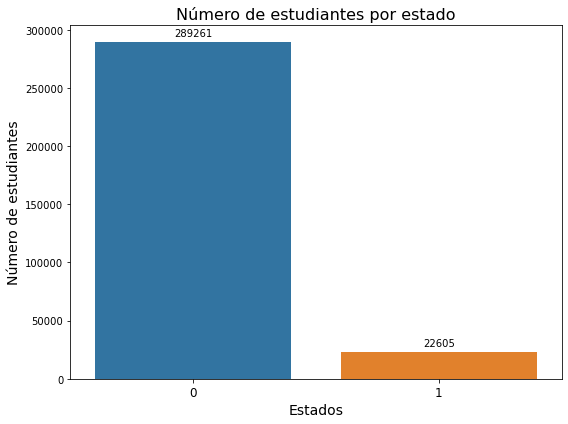

In [5]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plot = sns.barplot(x=df_students["ESTADO"].value_counts(ascending=False).index, 
                   y=df_students["ESTADO"].value_counts(ascending=False))
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plot.set_xticklabels(labels=df_students["ESTADO"].value_counts(ascending=False).index,
                     size=12, horizontalalignment="center")
plt.title("Número de estudiantes por estado", size=16)
plt.xlabel("Estados", size=14)
plt.ylabel("Número de estudiantes", size=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <p><b>Observations</b></p>
    <p>Based on the plot, we can say that we are facing an imbalanced classification problem</p>

</div>

## 4. Splitting data

First of all, we are going to separate the data to predict (2022) from the data to do the training (from 2013 to 2021)

In [6]:
df_students_2022 = df_students[df_students["ANO"]==2022].copy()
df_students_2022["ESTADO"] = np.NaN

df_students = df_students[df_students["ANO"]!=2022].copy()

Now, we are let's identify the training columns in the dataset

In [7]:
NOT_TRAINING_COLUMNS = [
    "ESTADO", "ANO", "PER_ID_ANO", "PER_ID", "INSTITUCION_LATITUDE", "INSTITUCION_LONGITUD",
]

TRAINING_COLUMNS = [col for col in df_students if col not in NOT_TRAINING_COLUMNS]

Let's proced to split the data

In [8]:
X = df_students[TRAINING_COLUMNS].copy()

In [9]:
y_target = df_students.loc[:, "ESTADO"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2,
                                                    stratify=y_target, random_state=42)

In [11]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print(30*"-")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (224949, 29)
y_train: (224949,)
------------------------------
X_test: (56238, 29)
y_test: (56238,)


## 5. Data preprocessing

In [12]:
def boolean_transformation(X):
    return X.astype(int)

In [13]:
X_train.columns

Index(['INSTITUCION', 'EDAD', 'GENERO', 'GRADO_COD', 'JORNADA', 'ESTRATO',
       'PAIS_ORIGEN', 'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR',
       'INSTITUCION_MODELO', 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
       'INSTITUCION_ZONA', 'INSTITUCION_CARACTER',
       'INSTITUCION_NUMERO_DE_SEDES', 'INSTITUCION_ESTADO',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO'],
      dtype='object')

In [14]:
CATEGORICAL_FEATURES = [
    "INSTITUCION", "GENERO", "JORNADA", "PAIS_ORIGEN", "DISCAPACIDAD", "SRPA", "INSTITUCION_SECTOR",
    "INSTITUCION_MODELO", "INSTITUCION_APOYO_ACADEMICO_ESPECIAL", "INSTITUCION_ZONA", "INSTITUCION_CARACTER",
    "INSTITUCION_ESTADO", "INSTITUCION_PRESTADOR_DE_SERVICIO", 
]
ORDINAL_FEATURES = [
    "GRADO_COD", "ESTRATO", "INSTITUCION_TAMAÑO"
]
NUMERICAL_FEATURES = [
    "EDAD", "INSTITUCION_NUMERO_DE_SEDES"
]
BOOLEAN_FEATURES = [
    "INSTITUCION_NIVEL_BASICA_PRIMARIA", "INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA", "INSTITUCION_NIVEL_MEDIA",
    "INSTITUCION_NIVEL_PREESCOLAR", "INSTITUCION_NIVEL_PRIMERA_INFANCIA", "INSTITUCION_ESPECIALIDAD_ACADÉMICA", 
    "INSTITUCION_ESPECIALIDAD_AGROPECUARIO", "INSTITUCION_ESPECIALIDAD_COMERCIAL", 
    "INSTITUCION_ESPECIALIDAD_INDUSTRIAL", "INSTITUCION_ESPECIALIDAD_NO_APLICA",
    "INSTITUCION_ESPECIALIDAD_OTRO"
]

In [15]:
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[
    [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    ['ESTRATO 0', 'ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 'ESTRATO 5', 'ESTRATO 6'],
    ['Pequeña', 'Mediana',  'Grande']
]))

numerical_pipeline = make_pipeline(StandardScaler())

boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

In [16]:
preprocessor = make_column_transformer(
    (categorical_pipeline, CATEGORICAL_FEATURES),
    (ordinal_pipeline, ORDINAL_FEATURES),
    (numerical_pipeline, NUMERICAL_FEATURES),
    (boolean_pipeline, BOOLEAN_FEATURES)
)

## 6. Random Forest

In [17]:
rfm = RandomForestClassifier(class_weight="balanced")

In [18]:
clf = make_pipeline(preprocessor, rfm)

In [19]:
sorted(clf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [20]:
param_grid = {
    "randomforestclassifier__n_estimators" : np.arange(500, 1000, 100),
    "randomforestclassifier__max_depth" : np.arange(20, 30, 2)
}

We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label

In [21]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [22]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc",
                             cv=stratified_kfold, n_jobs=-2)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
search.best_params_

In [ ]:
search.best_score_

In [ ]:
rfm_test = RandomForestClassifier(max_depth=20, n_estimators=600,
                                  class_weight="balanced",
                                  random_state=42,
                                  n_jobs=-1)

In [ ]:
clf_test = make_pipeline(preprocessor, rfm_test)

In [ ]:
clf_test.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, clf_test.predict(X_test))

In [ ]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE()),
    ("rfm_imblearn", RandomForestClassifier(max_depth=20, 
                                            n_estimators=600,
                                            random_state=42,
                                            n_jobs=-1)
    )
])

In [ ]:
imbpipeline_clf.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, imbpipeline_clf.predict(X_test))